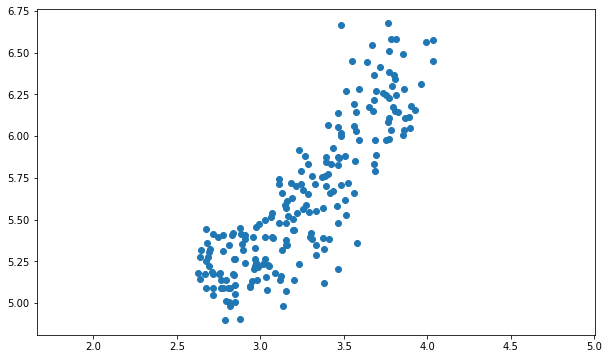

0.8604149377143469


In [1]:
#Correlated data in nature

import pandas as pd
df_grains = pd.read_csv('datasets/grains/seeds-width-vs-length.csv', header=None)
grains = df_grains.values

#You are given an array grains giving the width and length of samples of grain. You suspect that width and length will be
#correlated. To confirm this, make a scatter plot of width vs length and measure their Pearson correlation.

# Perform the necessary imports
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
plt.figure(figsize=(10, 6))

# Assign the 0th column of grains: width
width = grains[:,0]

# Assign the 1st column of grains: length
length = grains[:,1]

# Scatter plot width vs length
plt.scatter(width, length)
plt.axis('equal')
plt.show()

# Calculate the Pearson correlation
correlation, pvalue = pearsonr(width, length)

# Display the correlation
print(correlation)

In [2]:
#NOTE: As you would expect, the width and length of the grain samples are highly correlated.

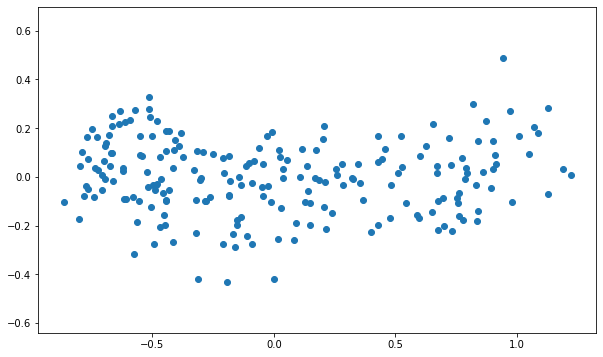

-3.9898639947466563e-17


In [3]:
#Decorrelating the grain measurements with PCA

plt.figure(figsize=(10, 6))

#You observed in the previous exercise that the width and length measurements of the grain are correlated. Now, you'll use
#PCA to decorrelate these measurements, then plot the decorrelated points and measure their Pearson correlation.

# Import PCA
from sklearn.decomposition import PCA

# Create PCA instance: model
model = PCA()

# Apply the fit_transform method of model to grains: pca_features
pca_features = model.fit_transform(grains)

# Assign 0th column of pca_features: xs
xs = pca_features[:,0]

# Assign 1st column of pca_features: ys
ys = pca_features[:,1]

# Scatter plot xs vs ys
plt.scatter(xs, ys)
plt.axis('equal')
plt.show()

# Calculate the Pearson correlation of xs and ys
correlation, pvalue = pearsonr(xs, ys)

# Display the correlation
print(correlation)

In [4]:
#NOTE: You've successfully decorrelated the grain measurements with PCA!

In [5]:
#Principal components

#On the right are three scatter plots of the same point cloud. Each scatter plot shows a different set of axes (in red). In
#which of the plots could the axes represent the principal components of the point cloud?

#Recall that the principal components are the directions along which the the data varies.

<img src='principal_components.svg'>

In [6]:
#Possible Answers

#None of them.

#Both plot 1 and plot 3.*

#Plot 2.

In [7]:
#NOTE: You've correctly inferred that the principal components have to align with the axes of the point cloud. This
#happens in both plot 1 and plot 3.

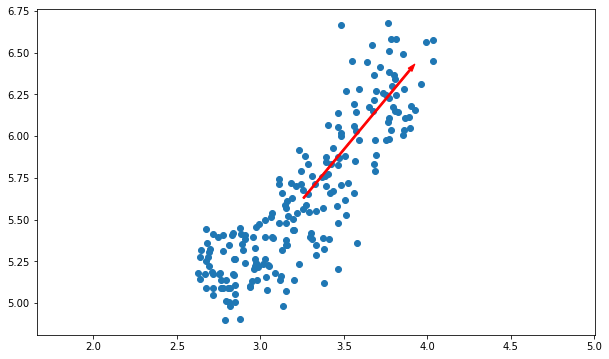

In [8]:
#The first principal component

plt.figure(figsize=(10, 6))

#The first principal component of the data is the direction in which the data varies the most. In this exercise, your job
#is to use PCA to find the first principal component of the length and width measurements of the grain samples, and
#represent it as an arrow on the scatter plot.

#The array grains gives the length and width of the grain samples. PyPlot (plt) and PCA have already been imported for you.

# Make a scatter plot of the untransformed points
plt.scatter(grains[:,0], grains[:,1])

# Create a PCA instance: model
model = PCA()

# Fit model to points
model.fit(grains)

# Get the mean of the grain samples: mean
mean = model.mean_

# Get the first principal component: first_pc
first_pc = model.components_[0,:]

# Plot first_pc as an arrow, starting at mean
plt.arrow(mean[0], mean[1], first_pc[0], first_pc[1], color='red', width=0.01)

# Keep axes on same scale
plt.axis('equal')
plt.show()

In [9]:
#NOTE: This is the direction in which the grain data varies the most.

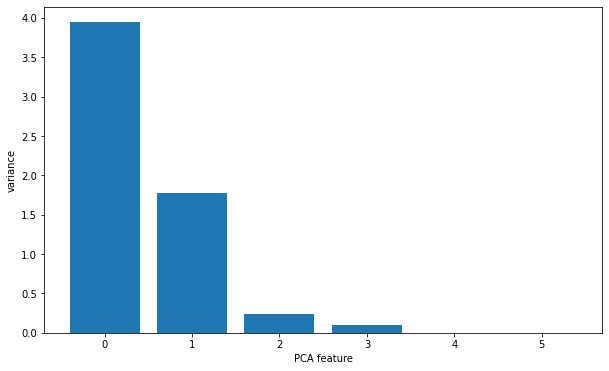

In [10]:
#Variance of the PCA features

df_fish = pd.read_csv('datasets/fish.csv', header=None)
samples = df_fish.drop(0, axis=1).values
plt.figure(figsize=(10, 6))

#The fish dataset is 6-dimensional. But what is its intrinsic dimension? Make a plot of the variances of the PCA features
#to find out. As before, samples is a 2D array, where each row represents a fish. You'll need to standardize the features
#first.

# Perform the necessary imports
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt

# Create scaler: scaler
scaler = StandardScaler()

# Create a PCA instance: pca
pca = PCA()

# Create pipeline: pipeline
pipeline = make_pipeline(scaler, pca)

# Fit the pipeline to 'samples'
pipeline.fit(samples)

# Plot the explained variances
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_)
plt.xlabel('PCA feature')
plt.ylabel('variance')
plt.xticks(features)
plt.show()

In [11]:
#NOTE: It looks like PCA features 0 and 1 have significant variance.

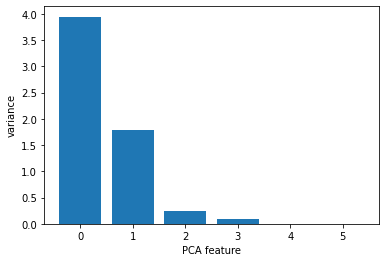

In [12]:
#Intrinsic dimension of the fish data

#In the previous exercise, you plotted the variance of the PCA features of the fish measurements. Looking again at your
#plot, what do you think would be a reasonable choice for the "intrinsic dimension" of the fish measurements? Recall that
#the intrinsic dimension is the number of PCA features with significant variance.

features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_)
plt.xlabel('PCA feature')
plt.ylabel('variance')
plt.xticks(features)
plt.show()

In [13]:
#Possible Answers

#1

#2*

#5

In [14]:
#NOTE: Since PCA features 0 and 1 have significant variance, the intrinsic dimension of this dataset appears to be 2.

In [15]:
#Dimension reduction of the fish measurements

df_fish = pd.read_csv('datasets/fish.csv', header=None)
samples = df_fish.drop(0, axis=1).values
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_samples = scaler.fit_transform(samples)

#In a previous exercise, you saw that 2 was a reasonable choice for the "intrinsic dimension" of the fish measurements. Now
#use PCA for dimensionality reduction of the fish measurements, retaining only the 2 most important components.

#The fish measurements have already been scaled for you, and are available as scaled_samples.

# Import PCA
from sklearn.decomposition import PCA

# Create a PCA model with 2 components: pca
pca = PCA(n_components=2)

# Fit the PCA instance to the scaled samples
pca.fit(scaled_samples)

# Transform the scaled samples: pca_features
pca_features = pca.transform(scaled_samples)

# Print the shape of pca_features
print(pca_features.shape)

(85, 2)


In [16]:
#NOTE: You've successfully reduced the dimensionality from 6 to 2.

In [17]:
#A tf-idf word-frequency array

documents = [
    'cats say meow',
    'dogs say woof',
    'dogs chase cats'
]

#In this exercise, you'll create a tf-idf word frequency array for a toy collection of documents. For this, use the
#TfidfVectorizer from sklearn. It transforms a list of documents into a word frequency array, which it outputs as a
#csr_matrix. It has fit() and transform() methods like other sklearn objects.

#You are given a list documents of toy documents about pets. Its contents have been printed in the IPython Shell.

# Import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# Create a TfidfVectorizer: tfidf
tfidf = TfidfVectorizer()

# Apply fit_transform to document: csr_mat
csr_mat = tfidf.fit_transform(documents)

# Print result of toarray() method
print(csr_mat.toarray(), '\n')

# Get the words: words
words = tfidf.get_feature_names()

# Print words
print(words)

[[0.51785612 0.         0.         0.68091856 0.51785612 0.        ]
 [0.         0.         0.51785612 0.         0.51785612 0.68091856]
 [0.51785612 0.68091856 0.51785612 0.         0.         0.        ]] 

['cats', 'chase', 'dogs', 'meow', 'say', 'woof']


In [18]:
#Clustering Wikipedia part I

#You saw in the video that TruncatedSVD is able to perform PCA on sparse arrays in csr_matrix format, such as
#word-frequency arrays. Combine your knowledge of TruncatedSVD and k-means to cluster some popular pages from Wikipedia. In
#this exercise, build the pipeline. In the next exercise, you'll apply it to the word-frequency array of some Wikipedia
#articles.

#Create a Pipeline object consisting of a TruncatedSVD followed by KMeans. (This time, we've precomputed the word-frequency
#matrix for you, so there's no need for a TfidfVectorizer).

#The Wikipedia dataset you will be working with was obtained from here.

# Perform the necessary imports
from sklearn.decomposition import TruncatedSVD
from sklearn.cluster import KMeans
from sklearn.pipeline import make_pipeline

# Create a TruncatedSVD instance: svd
svd = TruncatedSVD(n_components=50)

# Create a KMeans instance: kmeans
kmeans = KMeans(n_clusters=6)

# Create a pipeline: pipeline
pipeline = make_pipeline(svd, kmeans)

In [19]:
#NOTE: Now that you have set up your pipeline, you will use it in the next exercise to cluster the articles.

In [20]:
#Clustering Wikipedia part II

import pandas as pd
from scipy.sparse import csr_matrix
df_wiki = pd.read_csv('datasets/wikipedia_articles/wikipedia-vectors.csv', index_col=0)
articles = csr_matrix(df_wiki.transpose())
titles = list(df_wiki.columns)

#It is now time to put your pipeline from the previous exercise to work! You are given an array articles of tf-idf
#word-frequencies of some popular Wikipedia articles, and a list titles of their titles. Use your pipeline to cluster the
#Wikipedia articles.

#A solution to the previous exercise has been pre-loaded for you, so a Pipeline pipeline chaining TruncatedSVD with KMeans
#is available.

# Import pandas
import pandas as pd

# Fit the pipeline to articles
pipeline.fit(articles)

# Calculate the cluster labels: labels
labels = pipeline.predict(articles)

# Create a DataFrame aligning labels and titles: df
df = pd.DataFrame({'label': labels, 'article': titles})

# Display df sorted by cluster label
print(df.sort_values('label'))

    label                                        article
39      0                                  Franck Ribéry
37      0                                       Football
36      0              2014 FIFA World Cup qualification
35      0                Colombia national football team
34      0                             Zlatan Ibrahimović
33      0                                 Radamel Falcao
32      0                                   Arsenal F.C.
31      0                              Cristiano Ronaldo
30      0                  France national football team
38      0                                         Neymar
58      1                                         Sepsis
59      1                                    Adam Levine
57      1                          Red Hot Chili Peppers
56      1                                       Skrillex
55      1                                  Black Sabbath
54      1                                 Arctic Monkeys
53      1                      

In [21]:
#NOTE: Take a look at the cluster labels and see if you can identify any patterns!